**Exercise**, Solve the differential equations describing the dynamics of a simple pendulum the using Euler and RK4 methods. The equation of motion of a simple pendulum is given by: 

$$\frac{d^2s}{dt^2}=L\frac{d^2\theta}{dt^2}=-g\sin{\theta}$$

where $L$ = Length of String and $\theta$ = angle made with vertical. This second order differential equation may be written as two first order coupled equations as follows:

$$\frac{d\theta}{dt}=\omega$$

$$\frac{d\omega}{dt}=-\frac{g}{L}\sin{\theta}$$

# Numerical Simulation of a Simple Pendulum


[Image of simple pendulum diagram]


This notebook compares two numerical methods for solving the Ordinary Differential Equations (ODEs) representing the motion of a simple pendulum:

1.  **Euler's Method:** A first-order numerical procedure (simple but less accurate).
2.  **Runge-Kutta 4 (RK4):** A fourth-order method (higher accuracy and stability).

## The Physical Model
The state of the pendulum is defined by the angle $\theta$ and angular velocity $\omega$. The equations of motion (without small angle approximation) are:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{g}{L} \sin(\theta)$$

Where:
* $g$ = acceleration due to gravity
* $L$ = length of the pendulum

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Global Parameters (shared between both methods for fair comparison)
delta_t = 0.001
theta_0 = 0.1
omega_0 = 0.0
g = 10.0
L = 10.0
time_end = 10.0

print(f"Parameters set: dt={delta_t}s, Time={time_end}s, Initial Angle={theta_0} rad")

Parameters set: dt=0.001s, Time=10.0s, Initial Angle=0.1 rad


## Method 1: Euler's Method
Euler's method approximates the solution by taking the current rate of change and projecting it forward by $\Delta t$.

$$y_{n+1} = y_n + f(t_n, y_n) \cdot \Delta t$$

*Note: While simple, this method often creates 'energy drift' in oscillatory systems over time.*

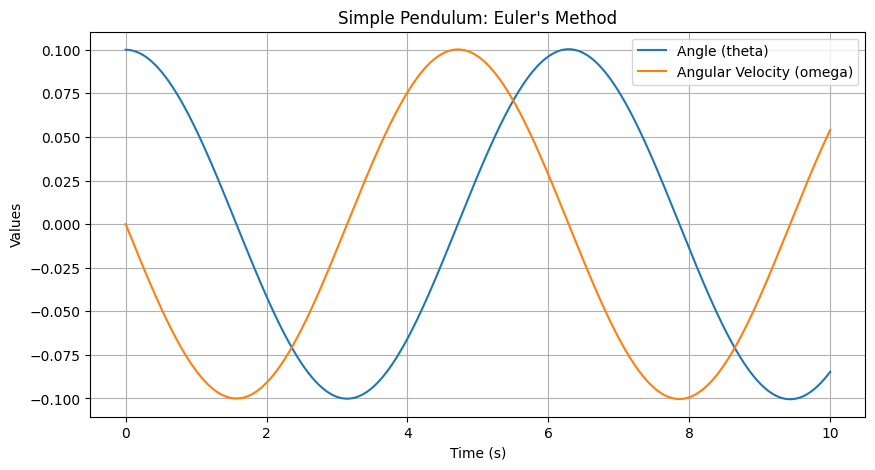

In [3]:
def func_pendulum_euler(theta, omega):
    """
    Calculates derivatives for the pendulum motion.
    """
    dtheta_dt = omega
    domega_dt = -g/L * np.sin(theta)
    
    return np.array([dtheta_dt, domega_dt])

# Setting up arrays
t = np.arange(0, time_end, delta_t)
y_euler = np.zeros((t.shape[0], 2))     # Column 0: theta, Column 1: omega
dydt = np.zeros((t.shape[0], 2))

# Initializing
y_euler[0, :] = np.array([theta_0, omega_0])
dydt[0, :] = func_pendulum_euler(theta_0, omega_0)

# Euler's Integration Loop
for i in range(1, t.shape[0]):
    # Update state using previous derivative
    y_euler[i, :] = y_euler[i-1, :] + dydt[i-1, :] * delta_t
    
    # Calculate new derivative for the next step
    dydt[i, :] = func_pendulum_euler(y_euler[i, 0], y_euler[i, 1])

# Plotting Motion
plt.figure(figsize=(10, 5))
plt.plot(t, y_euler[:, 0], label='Angle (theta)')
plt.plot(t, y_euler[:, 1], label='Angular Velocity (omega)')
plt.xlabel('Time (s)')
plt.ylabel('Values')
plt.title("Simple Pendulum: Euler's Method")
plt.legend()
plt.grid(True)
plt.show()

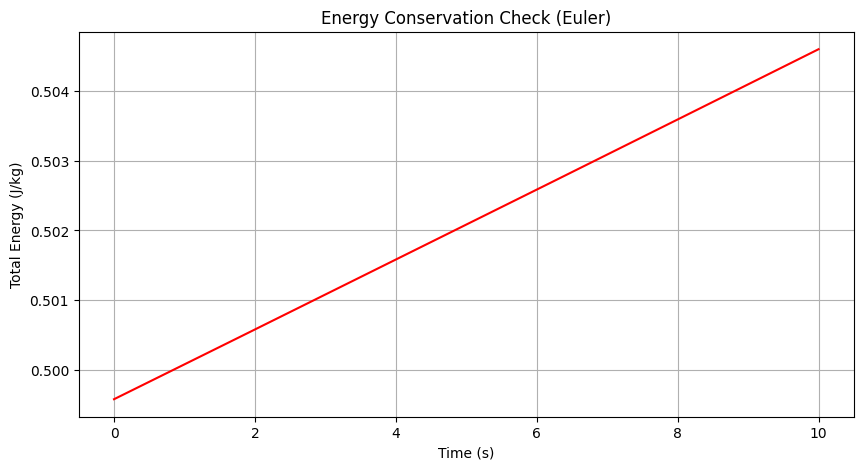

In [4]:
# Energy Calculation: KE + PE
# PE uses (1 - cos(theta)) relative to the lowest point
energy_euler = 0.5 * (L**2) * y_euler[:,1]**2 + g * L * (1 - np.cos(y_euler[:,0]))

plt.figure(figsize=(10, 5))
plt.plot(t, energy_euler, color='red')
plt.xlabel("Time (s)")
plt.ylabel("Total Energy (J/kg)")
plt.title("Energy Conservation Check (Euler)")
plt.grid(True)
plt.show()

## Method 2: Runge-Kutta 4 (RK4)
RK4 computes the slope at four different points within the time step and takes a weighted average. This results in significantly higher accuracy and better energy conservation for the pendulum.

$$y_{n+1} = y_n + \frac{\Delta t}{6} (k_1 + 2k_2 + 2k_3 + k_4)$$

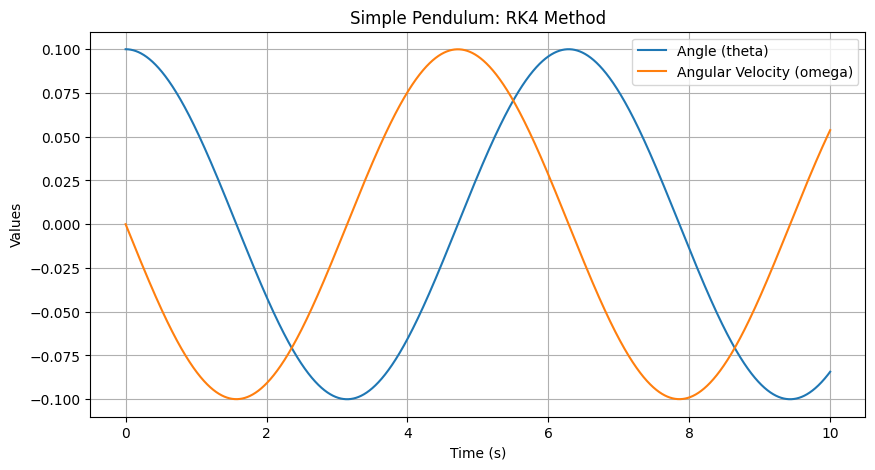

In [5]:
def func_pendulum_rk4(y_state):
    """
    Takes state array [theta, omega] and returns derivatives [dtheta/dt, domega/dt]
    """
    theta, omega = y_state
    dtheta_dt = omega
    domega_dt = -g/L * np.sin(theta)
    
    return np.array([dtheta_dt, domega_dt])

# Setting up arrays
y_rk4 = np.zeros((t.shape[0], 2))

# Initializing
y_rk4[0, :] = np.array([theta_0, omega_0])

# RK4 Integration Loop
for i in range(1, t.shape[0]):
    y_prev = y_rk4[i-1]
    
    k1 = func_pendulum_rk4(y_prev)
    k2 = func_pendulum_rk4(y_prev + 0.5 * k1 * delta_t)
    k3 = func_pendulum_rk4(y_prev + 0.5 * k2 * delta_t)
    k4 = func_pendulum_rk4(y_prev + k3 * delta_t)

    # Update using weighted average
    y_rk4[i, :] = y_prev + (delta_t / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

# Plotting Motion
plt.figure(figsize=(10, 5))
plt.plot(t, y_rk4[:, 0], label='Angle (theta)')
plt.plot(t, y_rk4[:, 1], label='Angular Velocity (omega)')
plt.xlabel('Time (s)')
plt.ylabel('Values')
plt.title("Simple Pendulum: RK4 Method")
plt.legend()
plt.grid(True)
plt.show()

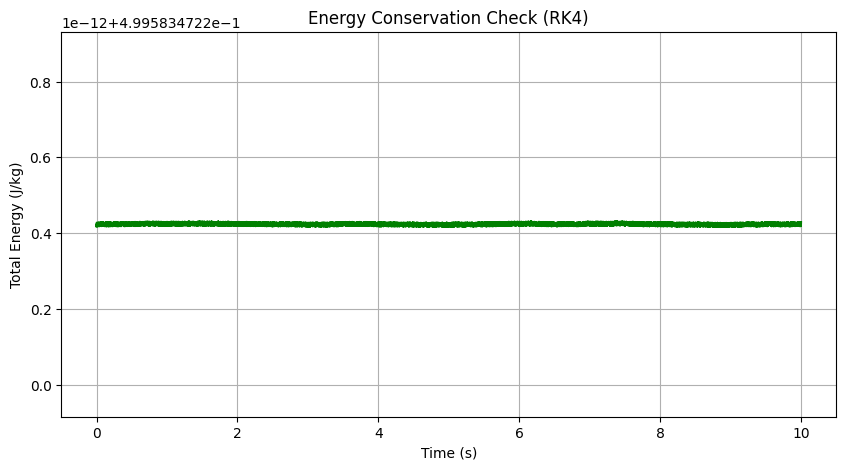

In [6]:
energy_rk4 = 0.5 * (L**2) * y_rk4[:,1]**2 + g * L * (1 - np.cos(y_rk4[:,0]))

plt.figure(figsize=(10, 5))
plt.plot(t, energy_rk4, color='green')
plt.xlabel("Time (s)")
plt.ylabel("Total Energy (J/kg)")
plt.title("Energy Conservation Check (RK4)")
plt.grid(True)


# Set limits to see small variations (optional)
# plt.ylim(min(energy_rk4)*0.999, max(energy_rk4)*1.001)

plt.show()

## Comparison
If you observe the Energy plots above:
1.  **Euler's Method:** You will likely see the energy increasing linearly over time. This is a numerical artifact (the simulation adds "fake" energy).
2.  **RK4 Method:** The energy should remain nearly constant (appearing as a flat line), demonstrating its suitability for simulating physical systems.

